## **Исходные данные:**

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
  - для одной выборки;
  - для двух выборок;
  - для нескольких выборок;
- тест для категориальных признаков.

## **Решение:**

In [1]:
# Подключаем библиотеки
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

### **1. Загрузка и обработка данных**

#### **1.1. Загрузка данных**

In [3]:
# Монтируем Google Диск
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Загружаем данные
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Andrew_learning/ds_salaries.csv')

In [5]:
# Выводим несколько первых строк датафрейма
display(df.head(2))
# Выводим несколько последних строк датафрейма
display(df.tail(2))

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


**Столбцы таблицы:**
- Unnamed:0 - безымянный столбец (задает каждой строке свой уникальный индентификатор, дублируя индекс)
- work_year - год, в котором была начислена зарплата;
- experience_level - опыт работы на  должности в течение года со следующими возможными значениями:
    - EN — Entry-level/Junior;
    - MI — Mid-level/Intermediate;
    - SE — Senior-level/Expert;
    - EX — Executive-level/Director.
- employment_type - тип занятости для этой должности:
    - PT — неполный рабочий день;
    - FT — полный рабочий день;
    - CT — контракт;
    - FL — фриланс.
- job_title - должность, в которой соискатель работал в течение года;
- salary - общая сумма начисленной заработной платы;
- salary_currency - валюта начисленной заработной платы в виде кода валюты ISO 4217;
- salary_in_usd - зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
- employee_residence - основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
- remote_ratio - общий объём работы, выполняемой удалённо.
 Возможные значения:
    - 0 — удалённой работы нет (менее 20 %);
    - 50 — частично удалённая работа;
    - 100 — полностью удалённая работа (более 80 %).
- company_location - страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166;
- company_size - среднее количество людей, работавших в компании в течение года:
    - S — менее 50 сотрудников (небольшая компания);
    - M — от 50 до 250 сотрудников (средняя компания);
    - L — более 250 сотрудников (крупная компания).

In [6]:
# Размерность датафрейма
df.shape

(607, 12)

**Вывод 1.1:**<br>
Данные HR-агенства о зарплатах в сфере Data Science за 2020–2022 годы для выполнения исследования данных, представляют собой датафрейм включающий: 607 строк и 12 столбцов. Описание столбцов и значений представлен выше

####**1.2. Проверка датафрейма на наличие пропусков и дубликатов, а также на корректность типов данных столбцов**

In [7]:
# Выводим основную информацию о числе непустых значений в столбцах и их типах в датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датафрейме 607 записей (без пропущенных значений)

In [8]:
# Так же проверку на наличие пропущенных значений NaN в датафрейме можно выполнив:
df.isna().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [9]:
# Проверка на наличие дубликатов
dupl_columns = list(df.columns) # создаем список столбцов dupl_columns, по которым будем искать совпадения
dupl_columns.remove('Unnamed: 0') # не включаем столбец Unnamed: 0, т.к. он задает каждой строке свой уникальный индентификатор, дублируя индекс
# Создаем маску дубликатов с помощью метода duplicated() и произведём фильтрацию
mask = df.duplicated(subset=dupl_columns)
df_duplicates = df[mask]
print(f'Количество найденных дубликатов: {df_duplicates.shape[0]}')

Количество найденных дубликатов: 42


In [10]:
# Удаляем дубликаты
df = df.drop_duplicates(subset=dupl_columns)
print('Размер таблицы после удаления дубликатов: {}'.format(df.shape))

Размер таблицы после удаления дубликатов: (565, 12)


**Вывод 1.2:** <br>
В результате проверки датафрема на наличие дубликатов и пропусков сделаны следующие выводы:
- присутствуют 42 дубликата (размер таблицы после удаления дубликатов: 565 строк, 12 столбцов),
- пропущенных значений нет,
- тип данных в датафреме определен верно.

####**1.3. Определение в данных неинформативных признаков, которые не будут участвовать в исследовании**

Неинформативные признаки, подлежащие удалению:
- Unnamed: 0 -  безымянный столбец (задает каждой строке свой уникальный индентификатор, дублируя индекс);
- salary и salary_currency - отвечают за размер зарплаты в нац.валюте и её валюту, данные признаки заменяет признак salary_in_usd данной таблицы, содержащий размер заработной платы в USD и дальнейшая работа будет производиться с ним.

In [11]:
df = df.drop(['Unnamed: 0', 'salary','salary_currency'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [12]:
print('Размер таблицы после удаления неинформативных признаков: {}'.format(df.shape))

Размер таблицы после удаления неинформативных признаков: (565, 9)


**Вывод 1.3:** <br>
Таким образом, после удаления неинформативных признаков размер таблицы составил: 565 строк, 9 столбцов

####**1.4. Классификация признаков на числовые и категориальные**

In [13]:
# Определим числовые и категориальные признаки, исключая 'remote_ratio' из числовых
numeric_columns = df.select_dtypes(include=['int64']).columns.difference(['remote_ratio'])
categorical_columns = df.select_dtypes(include=['object']).columns.union(['remote_ratio'])

**Вывод 1.4:** <br>

In [14]:
print("Числовые признаки:")
for col in numeric_columns:
    print(col)

print("\nКатегориальные признаки:")
for col in categorical_columns:
    print(col)

Числовые признаки:
salary_in_usd
work_year

Категориальные признаки:
company_location
company_size
employee_residence
employment_type
experience_level
job_title
remote_ratio


####**1.5.  Основные статистические характеристики для каждого из признаков**

**Вывод 1.5:** <br>

In [15]:
# Сводная статистика по датафрейму
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.000000,NaN,NaN


### **2. Разведывательный анализ данных**

### **2.1. Визуальный анализ данных**

**Задачи визуального анализа данных: <br>**
1. Необходимо выполнить базовый анализ для каждого признака, участвующего в исследовании:
- для числовых признаков построить гистограммы, иллюстрирующие распределения;
- для категориальных признаков определить количество записей для каждой категории и построить соответствующие визуализации.
2. Создать корректные визуализации, которые демонстрируют влияние каждого из признаков, участвующих в исследовании, на зарплату по всем наименованиям Data Scientist или на зарплату по всем должностям.
3. На основании визуального анализа сделать вывод о том какие факторы влияют на заработную плату.

**ЧИСЛОВЫЕ ПРИЗНАКИ**

Рассмотрим следующие числовые признаки:
- work_year (год, в котором была начислена зарплата);
- salary_in_usd (зарплата в долларах США).

#### **2.1.1. Базовый анализ для числовых признаков датафрейма**

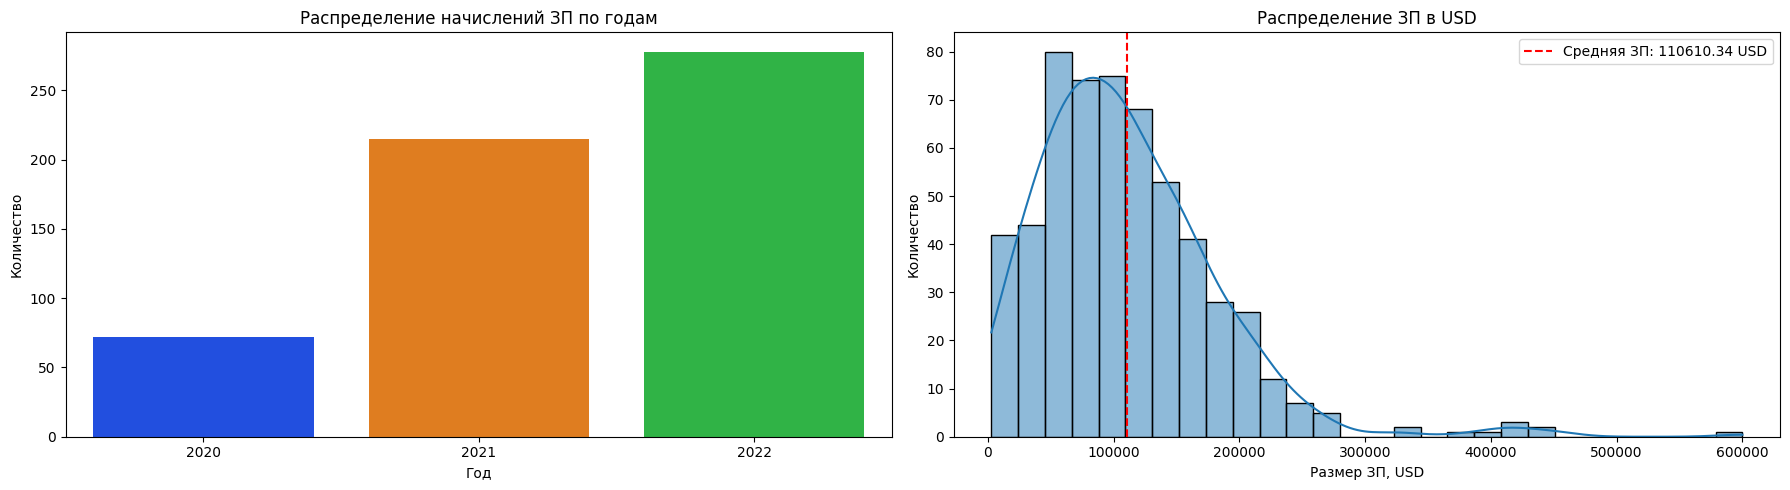

In [36]:
# Настройка холста
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Построим гистограмму для признака work_year
axes[0] = sns.countplot(df, x='work_year', hue ='work_year', palette= 'bright', legend=False, ax=axes[0])
axes[0].set_title('Распределение начислений ЗП по годам')
axes[0].set(xlabel='Год', ylabel='Количество')

# Построим гистограмму для признака salary_in_usd
sns.histplot(df, x='salary_in_usd', kde=True, ax=axes[1])
axes[1].set_title('Распределение ЗП в USD')
axes[1].set(xlabel='Размер ЗП, USD', ylabel='Количество')
# Рассчитываем среднюю зарплату для признака salary_in_usd
mean_salary = df['salary_in_usd'].mean()
# Добавляем линию средней зарплаты на график
axes[1].axvline(mean_salary, color='red', linestyle='--', label=f'Средняя ЗП: {mean_salary:.2f} USD')
axes[1].legend()

plt.tight_layout()
plt.show()

In [37]:
#  Для анализа и быстрого понимания распределения заработной платы в датафрейме посмотрим числовые характеристики для признака для признака salary_in_usd
# и преобразуем в датафрейм
data_agg = df['salary_in_usd'].describe().round(2).to_frame()
display(data_agg)

,salary_in_usd
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


**Выводы:**<br>
1. График "Распределение начислений ЗП по годам" показывает как изменялось количество специалистов в зависимости от года по направлению Data Science. Данные показывают, что с каждым годом количество специалиство, получающих ЗП в данной сфере, увеличивается, что может свидетельствовать о растущем спросе на специалистов этой профессии.
2. График "Распределение ЗП в USD" показывает диапазон распредления ЗП для специалистов данной сферы. На основании полученных результатов можно сделать следующие выводы:
- распределение зарплат не является нормальным, так как медианное значение составляет 100,000 USD, а среднее значение — 110,610.34 USD. Это говорит о том, что существует перекос в сторону более высоких зарплат.
- на графике присутствуют крайние значения — минимальная зарплата составляет 2,859 USD, а максимальная достигает 600,000 USD, что указывают на наличие аномальных данных (выбросов) как в нижнем, так и в верхнем диапазонах.
- диапазон зарплат от 60,757 до 150,000 USD, что указывает на то, что для большинства специалистов зарплаты в этой сфере находятся в среднем или выше среднего диапазона.

#### **2.1.2. Анализ влияния числовых признаков на заработную плату**

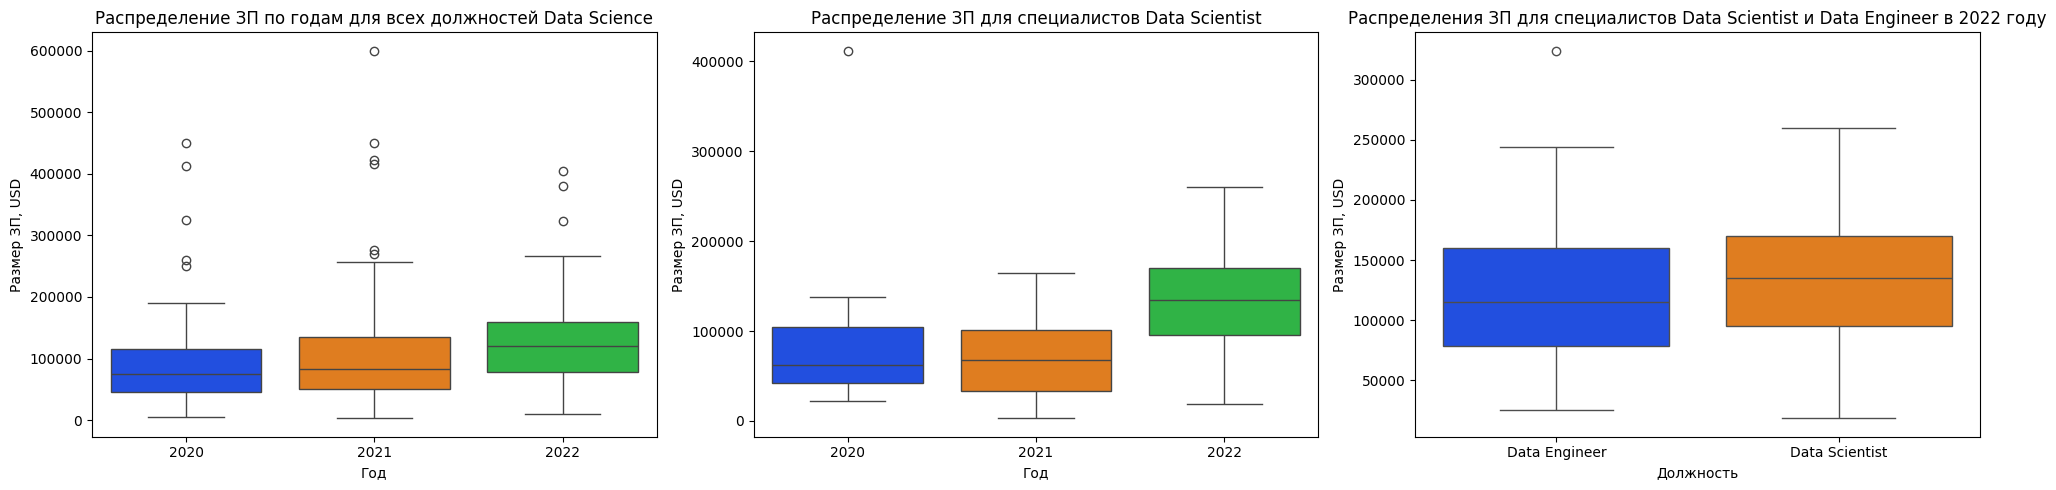

In [38]:
# Настройка холста
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Построим график распределения ЗП по годам для всех должностей Data Science
sns.boxplot(df, x='work_year', y='salary_in_usd', hue='work_year', palette= 'bright', legend=False, ax=axes[0])
axes[0].set(xlabel='Год', ylabel='Размер ЗП, USD')
axes[0].set_title('Распределение ЗП по годам для всех должностей Data Science')

# Построим график распределения ЗП по годам для специалистов Data Scientist
sns.boxplot(df[df['job_title'] == 'Data Scientist'], x='work_year', y='salary_in_usd', hue='work_year', palette= 'bright', legend=False, ax=axes[1])
axes[1].set(xlabel='Год', ylabel='Размер ЗП, USD')
axes[1].set_title('Распределение ЗП для специалистов Data Scientist')

# Построим график распределения ЗП для специалистов Data Scientist и Data Engineer в 2022 году
sns.boxplot(df[(df['work_year'] == 2022) & (df['job_title'].isin(['Data Scientist', 'Data Engineer']))], x='job_title', y='salary_in_usd', hue='job_title',
            palette= 'bright')
plt.title('Распределения ЗП для специалистов Data Scientist и Data Engineer в 2022 году')
plt.xlabel('Должность')
plt.ylabel('Размер ЗП, USD')

plt.tight_layout()
plt.show()

**Выводы:** <br>
1. График "Распределение зарплаты по годам для всех должностей Data Science" показывает как зарплата увеличивается с каждым годом, что может свидетельствовать о росте спроса на специалистов или повышения уровня квалификации. Также из графика видно, что медианные значения зарплат растут с каждым годом, что указывает на общее увеличение заработной платы по всем должностям в сфере Data Science. Но при этом также присутствуют выбросы (аномальные данные), анализ которых проведем при статистическом анализе данных.
2. График "Распределение зарплаты по годам для специалистов Data Scientist" показывает увеличение медианной зарплаты с каждым годом для специалистов по направлению Data Scientist, подтверждая высокий спрос на эту профессию. Также из графика видно, что диапазон зарплат стабильно расширяется, хотя в 2021 году было небольшое снижение верхнего диапазона зарплаты для специалистов Data Science.
3. График "Распределения ЗП для специалистов Data Scientist и Data Engineer в 2022 году" показывает, что медианная зарплата для Data Scientists несколько выше, чем медианная зарплата для Data Engineers, что может указывать на более высокую среднюю оплату труда для специалистов в области анализа данных.


#### **2.1.3. Базовый анализ для категориальных признаков датафрейма**

**КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ**

Рассмотрим следующие категориальные признаки:
- experience_level (опыт работы на должности в течение года со следующими возможными значениями:
    - EN — Entry-level/Junior;
    - MI — Mid-level/Intermediate;
    - SE — Senior-level/Expert;
    - EX — Executive-level/Director).
- employment_type (тип занятости для этой должности:
    - PT — неполный рабочий день;
    - FT — полный рабочий день;
    - CT — контракт;
    - FL — фриланс).
- job_title (должность, в которой соискатель работал в течение года);
- employee_residence (основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166);
- remote_ratio (общий объём работы, выполняемой удалённо).
- company_location (страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166);
- company_size (среднее количество людей, работавших в компании в течение года:
    - S — менее 50 сотрудников (небольшая компания);
    - M — от 50 до 250 сотрудников (средняя компания);
    - L — более 250 сотрудников (крупная компания)).

- **experience_level**

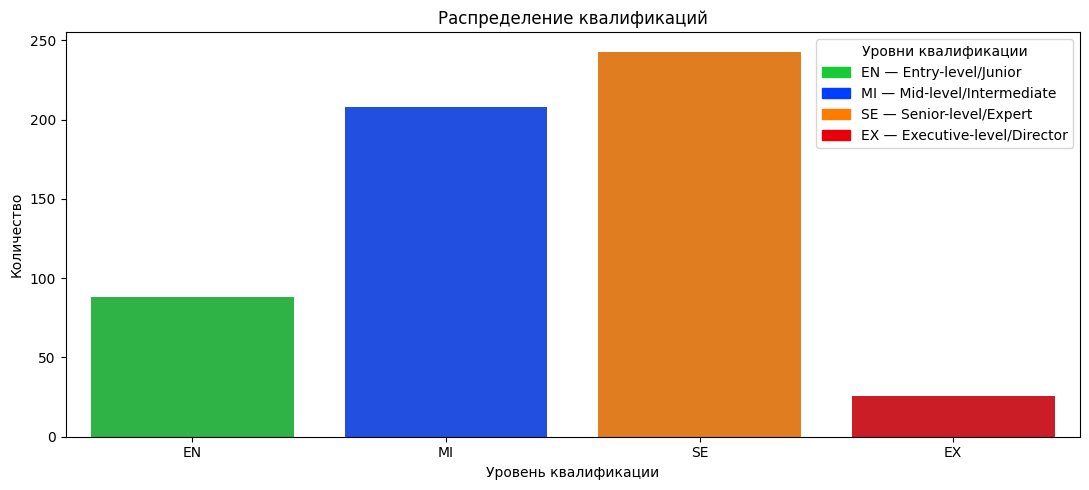

In [39]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

# Построим гистограмму для признака experience_level
order = ['EN', 'MI', 'SE', 'EX']
ax = sns.countplot(df, x='experience_level', hue='experience_level', palette='bright', order=order, ax=ax)
ax.set(xlabel='Уровень квалификации', ylabel='Количество')
ax.set_title('Распределение квалификаций')

# Добавим кастомную легенду с пользовательскими метками
legend_labels = [
    mpatches.Patch(color=sns.color_palette("bright")[2], label='EN — Entry-level/Junior'),
    mpatches.Patch(color=sns.color_palette("bright")[0], label='MI — Mid-level/Intermediate'),
    mpatches.Patch(color=sns.color_palette("bright")[1], label='SE — Senior-level/Expert'),
    mpatches.Patch(color=sns.color_palette("bright")[3], label='EX — Executive-level/Director')
]

# Добавим легенду с кастомными метками
plt.legend(handles=legend_labels, title="Уровни квалификации", loc='upper right')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Распределение квалификаций" показывает численное соотношение специалистов на различных уровнях квалификации: от начального (EN) до уровня директора (EX). На основании полученных результатов видно, что преобладающий уровень квалификации сотрудников мидл (MI) и сеньор (SE).

- **employment_type**

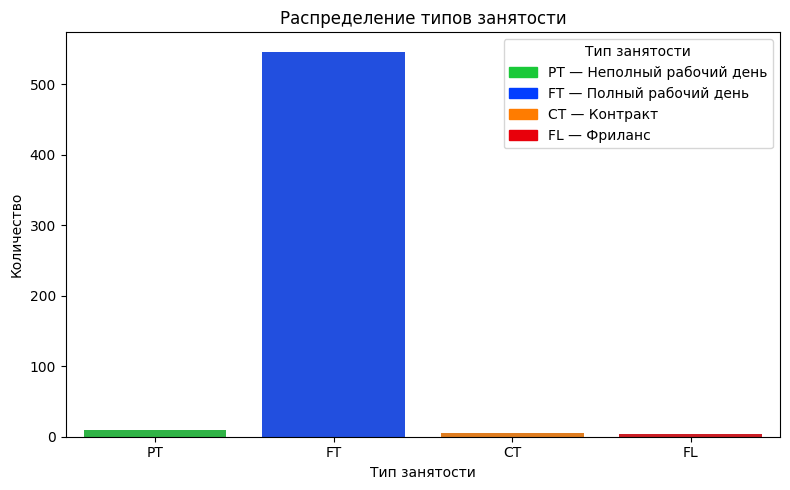

In [40]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Построим гистограмму для признака employment_type
order = ['PT', 'FT', 'CT', 'FL']
ax = sns.countplot(df, x='employment_type', order=order, hue='employment_type', palette='bright', ax=ax)
ax.set(xlabel='Тип занятости', ylabel='Количество')
ax.set_title('Распределение типов занятости')

# Добавим кастомную легенду с пользовательскими метками
legend_labels = [
    mpatches.Patch(color=sns.color_palette("bright")[2], label='PT — Неполный рабочий день'),
    mpatches.Patch(color=sns.color_palette("bright")[0], label='FT — Полный рабочий день'),
    mpatches.Patch(color=sns.color_palette("bright")[1], label='CT — Контракт'),
    mpatches.Patch(color=sns.color_palette("bright")[3], label='FL — Фриланс')
]

# Добавим легенду с кастомными метками
ax.legend(handles=legend_labels, title="Тип занятости", loc='upper right')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Распределение типов занятости" показывает, что большинство специалистов Data Science работают полный рабочий день.

- **job_title**

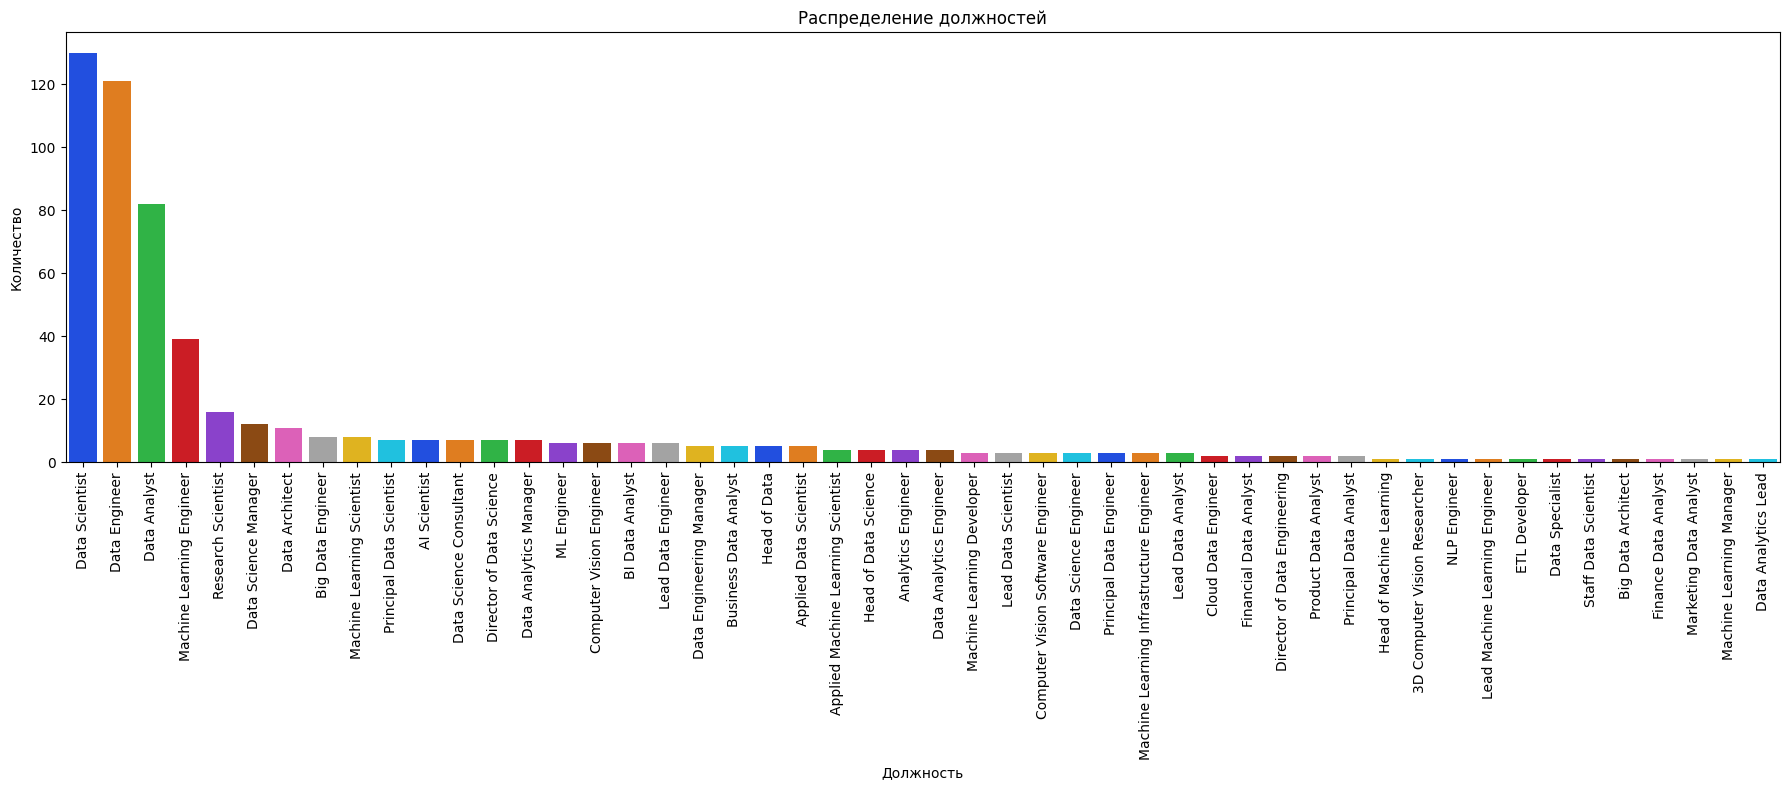

In [41]:
# Выполним подсчет каждой уникальной должности в столбце job_title
job_title_counts = df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['job_title', 'count'] # переименуем столбцы

# Настройка холста
plt.figure(figsize=(18, 8))

# Построим столбчатую диаграмму для признака job_title
sns.barplot(data=job_title_counts, x='job_title', y='count', hue='job_title', palette='bright', legend=False)
plt.title('Распределение должностей')
plt.xlabel('Должность')
plt.ylabel('Количество')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Распределение должностей" показывает какие должности наиболее популярны и востребованы в области Data Science. Наиболее популярными должностями согласно графику являются:Data Scientist, Data Engineer и Data Analyst.

- **employee_residence**

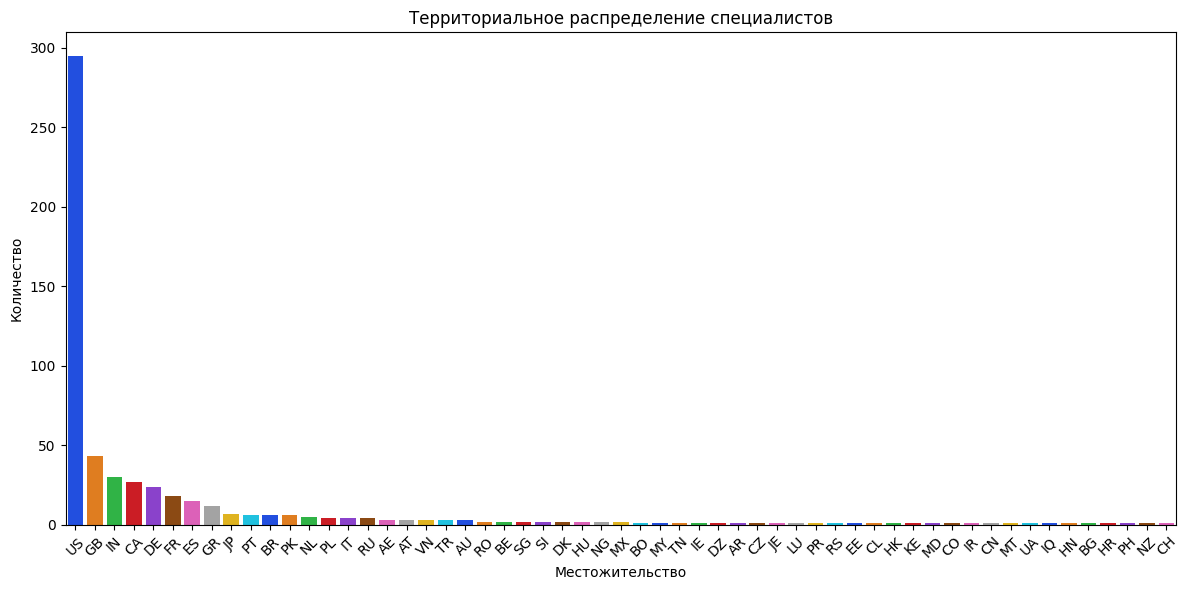

In [42]:
# Выполним подсчет каждой уникальной страны в столбце employee_residence
residence_counts = df['employee_residence'].value_counts().reset_index()
residence_counts.columns = ['employee_residence', 'count']  # Переименуем столбцы

# Настройка холста
plt.figure(figsize=(12, 6))

# Построим столбчатый график для признака employee_residence
sns.barplot(data=residence_counts, x='employee_residence', y='count', hue='employee_residence', palette='bright')
plt.title('Территориальное распределение специалистов')
plt.xlabel('Местожительство')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Территориальное распределение специалистов" показывает как специалисты распределены территориально, что позволяет понять, в каких географических зонах сосредоточено большинство специалистов. На основании полученных результатов видно, что территориально большинство специалистов находятся в Соединенных штатах Америки (US), Великобритания (GB), Индия (IN).

- **remote_ratio**

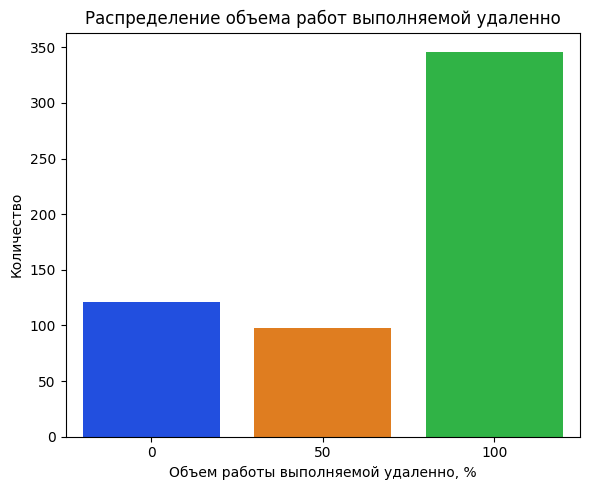

In [43]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Построим гистограмму для признака remote_ratio
ax = sns.countplot(df, x='remote_ratio', hue='remote_ratio', palette='bright', legend=False, ax=ax)
ax.set_title('Распределение объема работ выполняемой удаленно')
ax.set(xlabel='Объем работы выполняемой удаленно, %', ylabel='Количество')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Распределение объема работ выполняемой удаленно" показывает наиболее популярный формат работы. На основании полученных результатов видно, что удаленный формат работы для специалистов данной сферы наиболее популярен, чем гибридный график и работа в офисе.

- **company_location**

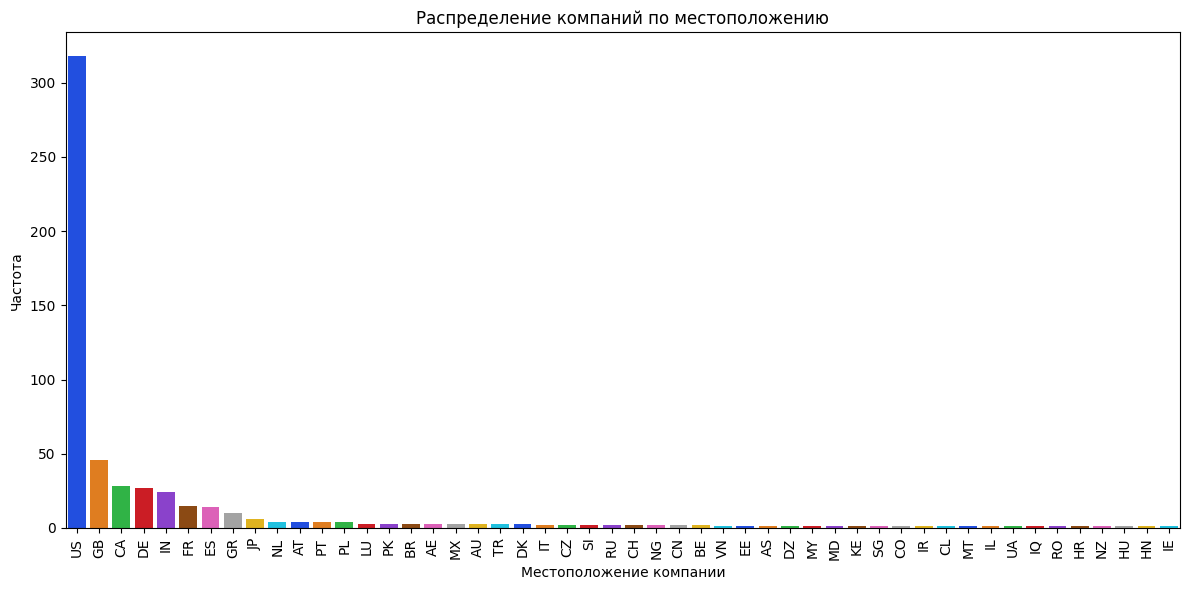

In [44]:
# Выполним подсчёт количества компаний для каждого местоположения
company_location_counts = df['company_location'].value_counts().reset_index()
company_location_counts.columns = ['company_location', 'count']  # Переименуем столбцы

# Настройка холста
plt.figure(figsize=(12, 6))

# Построим столбчатую диаграмму для признака company_location
sns.barplot(data=company_location_counts, x='company_location', y='count', hue = 'company_location', palette='bright', legend=False)
plt.title('Распределение компаний по местоположению')
plt.xlabel('Местоположение компании')
plt.ylabel('Частота')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Распределение компаний по местоположению" показывает распределение компаний в зависимости от их местоположения. На основании полученных результатов видно, что наибольшее количество компаний сосредоточено в  Соединенных штатах Америки (US), Великобритании (GB), Канаде (CA), таким образом эти страны можно считать лидерами по количеству компаний в исследуемой сфере.

- **company_size**

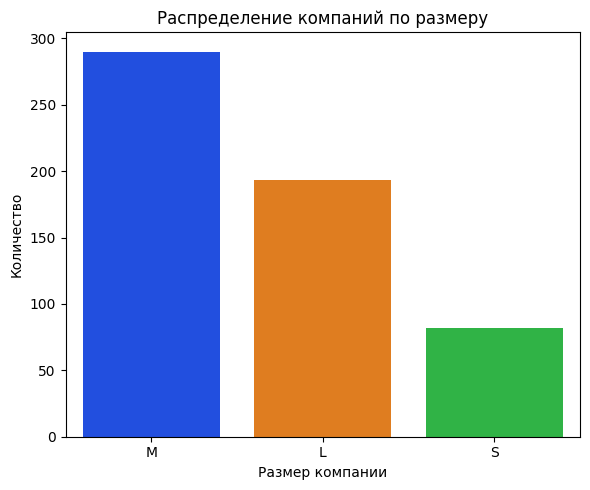

In [45]:
# Выполним подсчёт количества компаний по размеру
company_size_counts = df['company_size'].value_counts().reset_index()
company_size_counts.columns = ['company_size', 'count']  # Переименуем столбцы

# Настройка холста
plt.figure(figsize=(6, 5))

# Построим столбчатую диаграмму для признака company_size
sns.barplot(data=company_size_counts, x='company_size', y='count', hue = 'company_size', palette='bright', legend=False)
plt.title('Распределение компаний по размеру')
plt.xlabel('Размер компании')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Распределение компаний по размеру" отображает количество компаний разных размеров. На основании полученных результатов видно, что большинство компаний в данных относятся к категории среднего размера (M), что может свидетельствовать о высоком спросе на специалистов в организациях средней величины в рассматриваемой сфере. Крупные и малые компании встречаются реже. Доля малых компаний указывает на высокую конкуренцию на рынке труда, где им сложнее привлекать квалифицированных специалистов, тогда как крупные компании могут вести более избирательный и целенаправленный набор, предлагая узкоспециализированные роли

#### **2.1.4. Анализ влияния категориальных признаков на заработную плату**

- **experience_level**

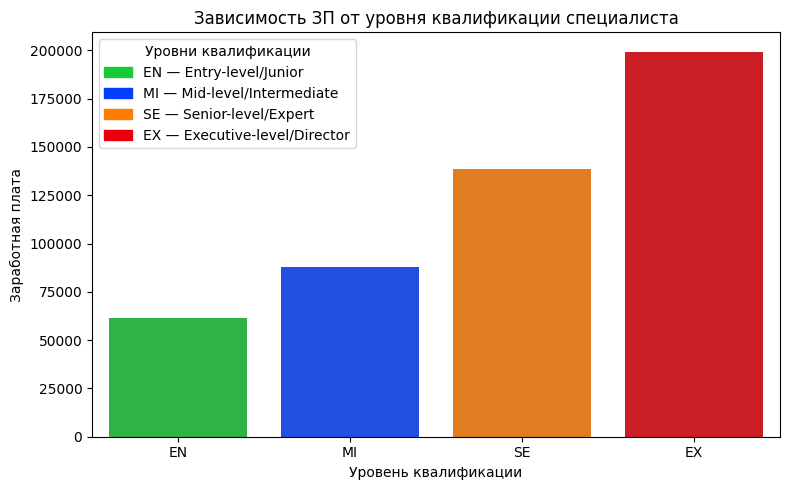

In [46]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Построим график зависимости ЗП от уровня квалификации специалиста
order = ['EN', 'MI', 'SE', 'EX']
ax = sns.barplot(df, x='experience_level', y='salary_in_usd', hue='experience_level', order=order, palette='bright', ax=ax, errorbar=None)
ax.set(xlabel='Уровень квалификации', ylabel='Заработная плата')
ax.set_title('Зависимость ЗП от уровня квалификации специалиста')

# Добавим кастомную легенду с пользовательскими метками
legend_labels = [
    mpatches.Patch(color=sns.color_palette("bright")[2], label='EN — Entry-level/Junior'),
    mpatches.Patch(color=sns.color_palette("bright")[0], label='MI — Mid-level/Intermediate'),
    mpatches.Patch(color=sns.color_palette("bright")[1], label='SE — Senior-level/Expert'),
    mpatches.Patch(color=sns.color_palette("bright")[3], label='EX — Executive-level/Director')
]

# Добавим легенду с кастомными метками
plt.legend(handles=legend_labels, title="Уровни квалификации", loc='upper left')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Зависимость ЗП от уровня квалификации специалиста" показывает, что уровень квалификации специалиста оказывает значительное влияние на зарплату. С увеличением уровня квалификации от начального (EN) к исполнительному (EX) средний уровень зарплат возрастает. Наибольший рост наблюдается при переходе от среднего уровня (MI) к старшему (SE) и исполнительному (EX), что указывает на высокий спрос на специалистов с высокой квалификацией в сфере Data Science, а также на значительное увеличение дохода с продвижением по карьерной лестнице.

- **employment_type**

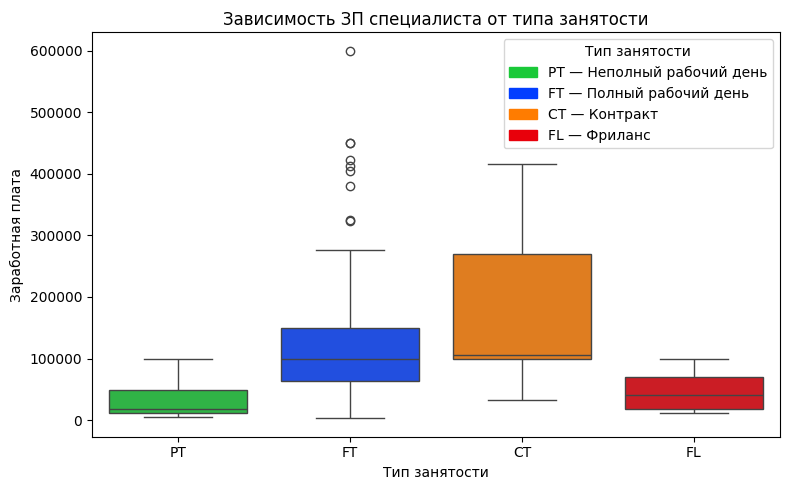

In [47]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Построим график зависимости ЗП специалиста от типа занятости
order = ['PT', 'FT', 'CT', 'FL']
ax = sns.boxplot(data=df, x='employment_type', y='salary_in_usd', hue='employment_type', order=order, palette='bright', ax=ax)
ax.set(xlabel='Тип занятости', ylabel='Заработная плата')
ax.set_title('Зависимость ЗП специалиста от типа занятости')

# Добавим кастомную легенду с пользовательскими метками
legend_labels = [
    mpatches.Patch(color=sns.color_palette("bright")[2], label='PT — Неполный рабочий день'),
    mpatches.Patch(color=sns.color_palette("bright")[0], label='FT — Полный рабочий день'),
    mpatches.Patch(color=sns.color_palette("bright")[1], label='CT — Контракт'),
    mpatches.Patch(color=sns.color_palette("bright")[3], label='FL — Фриланс')
]

# Добавим легенду с кастомными метками
ax.legend(handles=legend_labels, title="Тип занятости", loc='upper right')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Зависимость ЗП специалиста от типа занятости" показывает, что наиболее стабильные и высокие зарплаты наблюдаются у специалистов на полной занятости (FT). Контракт (CT) и фриланс (FL) тип занятости  имеют значительные колебания в заработной плате, что отражает различия в проектах и опыте, необходимом для выполнения задач. Неполный рабочий день (PT) имеет самые низкие средние значения зарплаты, что связано с временным характером выполняемой работы.

- **job_title**

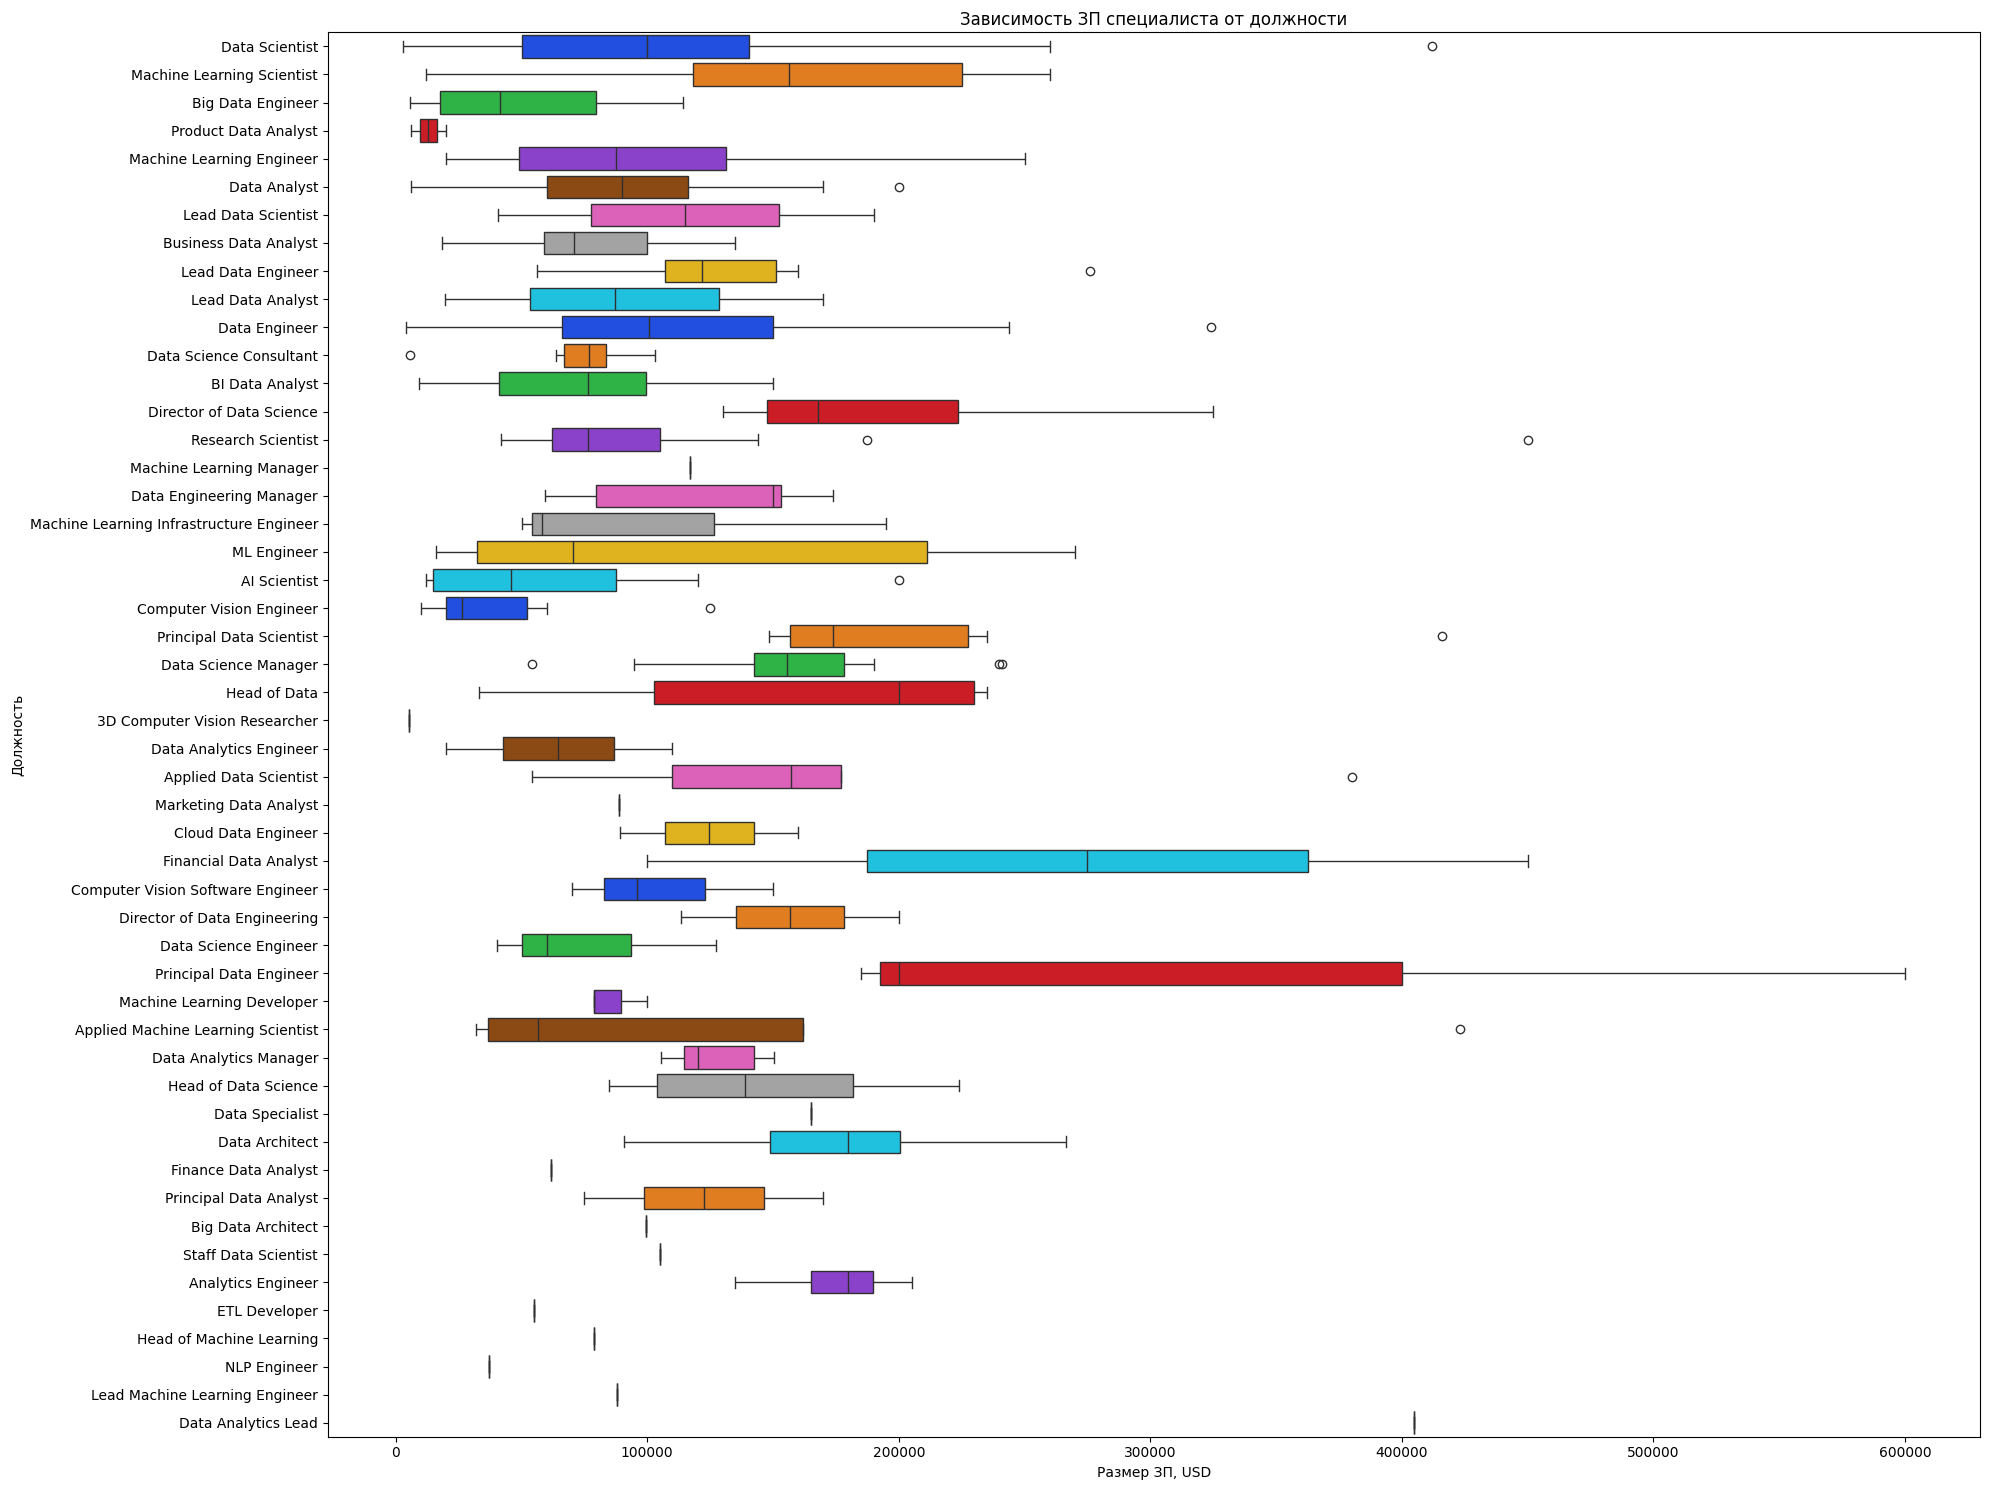

In [48]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Построим график зависимости ЗП специалиста от должности
sns.boxplot(df, x='salary_in_usd', y='job_title', hue='job_title', palette= 'bright', legend=False, ax=ax)
ax.set(xlabel='Размер ЗП, USD', ylabel='Должность')
ax.set_title('Зависимость ЗП специалиста от должности')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Зависимости зарплаты специалиста от должности" позволяет визуально оценить, как различаются заработные платы в зависимости от занимаемой должности.Визуальный анализ показал, что лишь 10 должностей имеют зарплату свыше 300 000 USD: Principal Data Engineer, Research Scientist, Financial Data Analyst, Applied Machine Learning Scientist, Principal Data Scientist, Data Scientist, Data Analytics Lead, Applied Data Scientist, Director of Data Science, и Data Engineer. Это свидетельствует о том, что узкие специальности, требующие глубоких знаний и навыков, как правило, имеют более высокие уровни зарплаты.

- **employee_residence**

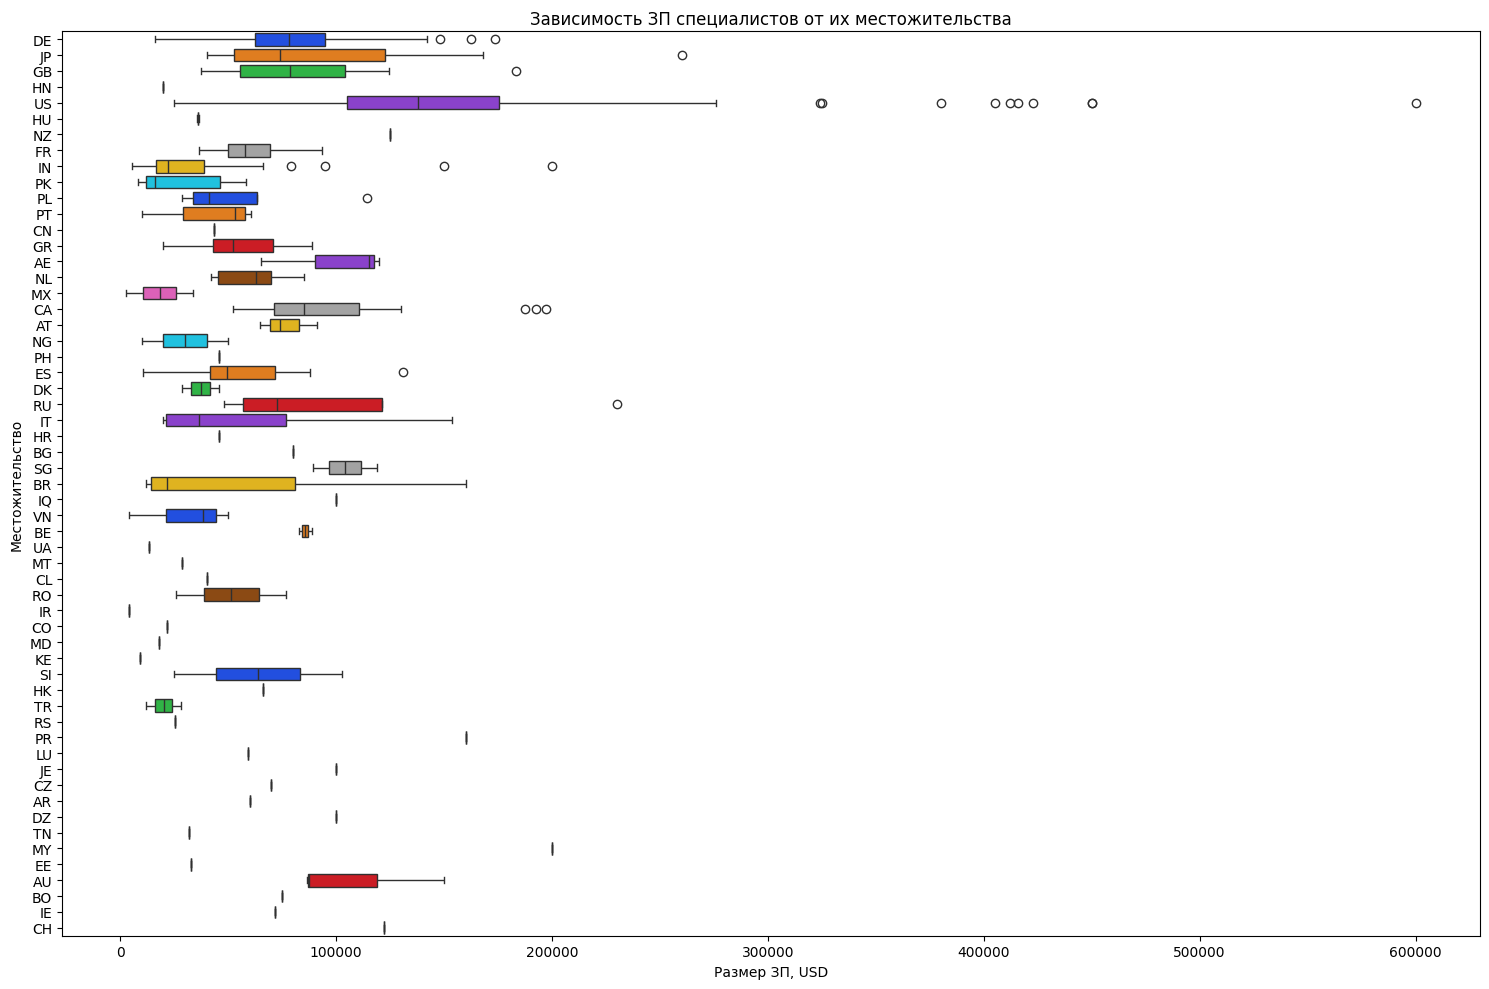

In [49]:
# Настройка холста
plt.figure(figsize=(15, 10))

# Построим график зависимости ЗП специалистов от их местожительства
ax = sns.boxplot(df, x='salary_in_usd', y='employee_residence', hue='employee_residence', palette='bright', legend=False)
ax.set(xlabel='Размер ЗП, USD', ylabel='Местожительство')
ax.set_title('Зависимость ЗП специалистов от их местожительства')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Зависимость ЗП специалистов от их местожительства" дает наглядное представление о том, как страна проживания специалиста влияет на уровень заработной платы. Согласно полученным результатам видно, что специалисты, работающие в таких местах, как США и в западноевропейских странах, могут получать зарплаты значительно выше, чем их коллеги в других регионах.

- **remote_ratio**

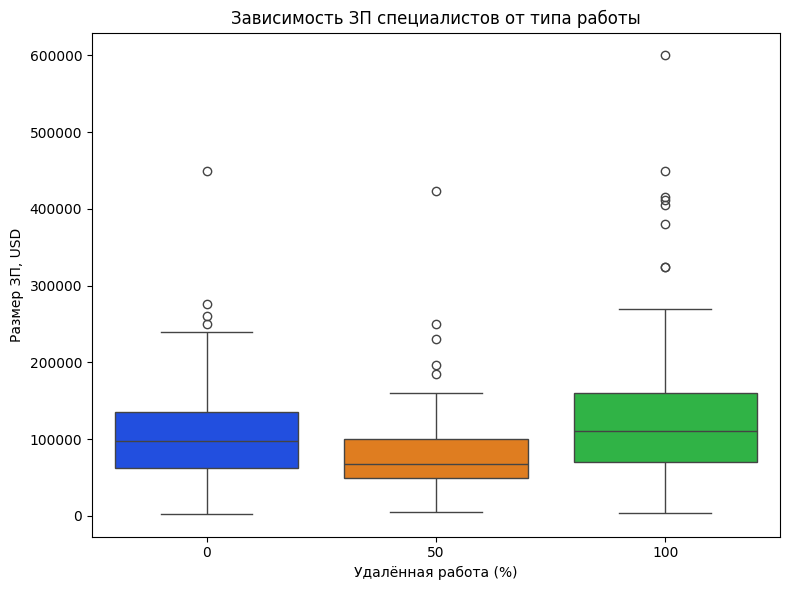

In [50]:
# Настройка холста
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Построим график зависимости ЗП специалистов от удалённой работы
ax = sns.boxplot(df, x='remote_ratio', y='salary_in_usd', hue='remote_ratio', palette='bright', legend=False)
ax.set(xlabel='Удалённая работа (%)', ylabel='Размер ЗП, USD')
ax.set_title('Зависимость ЗП специалистов от типа работы')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Зависимость ЗП специалистов от типа работы" показывает, что специалисты на полностью удалённых позициях зарабатывают больше по сравнению с офисными сотрудниками. Данная тенденция может объясняться растущим спросом на квалифицированных удалённых сотрудников и возможностью компаний нанимать талантливых специалистов из разных регионов. Средние зарплаты для сотрудников, работающих частично удалённо находятся между зарплатами полностью удалённых и полностью офисных работников, что свидетельствует о том, что частичная удалёнка предлагает некоторую гибкость, но не так высоко ценится, как полностью удалённый формат.

- **company_location**

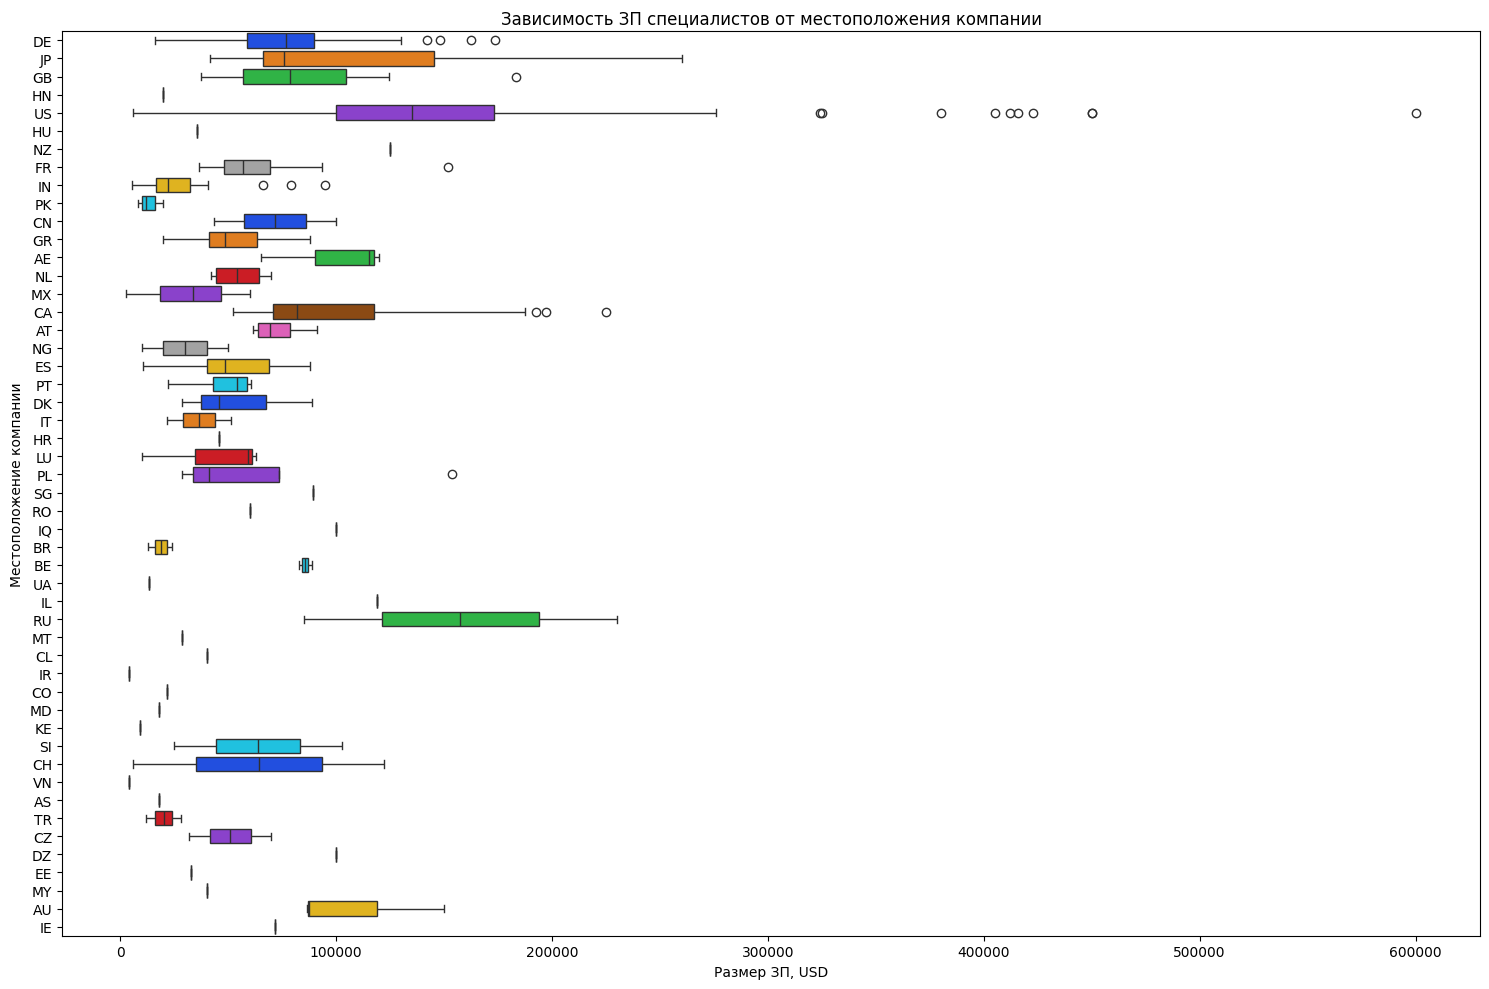

In [51]:
# Настройка холста
plt.figure(figsize=(15, 10))

# Построим график зависимости ЗП специалистов от их местожительства
ax = sns.boxplot(df, x='salary_in_usd', y='company_location', hue='company_location', palette='bright', legend=False)
ax.set(xlabel='Размер ЗП, USD', ylabel='Местоположение компании')
ax.set_title('Зависимость ЗП специалистов от местоположения компании')

plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Зависимость ЗП специалистов от местоположения компании" показывает, что зарплаты специалистов варьируются в зависимости от страны, где расположена компания. Лидером по ЗП являются компании расположенные в США и в западноевропейских странах, что связано с более высоким уровнем жизни и стоимости труда в этих регионах.

- **company_size**

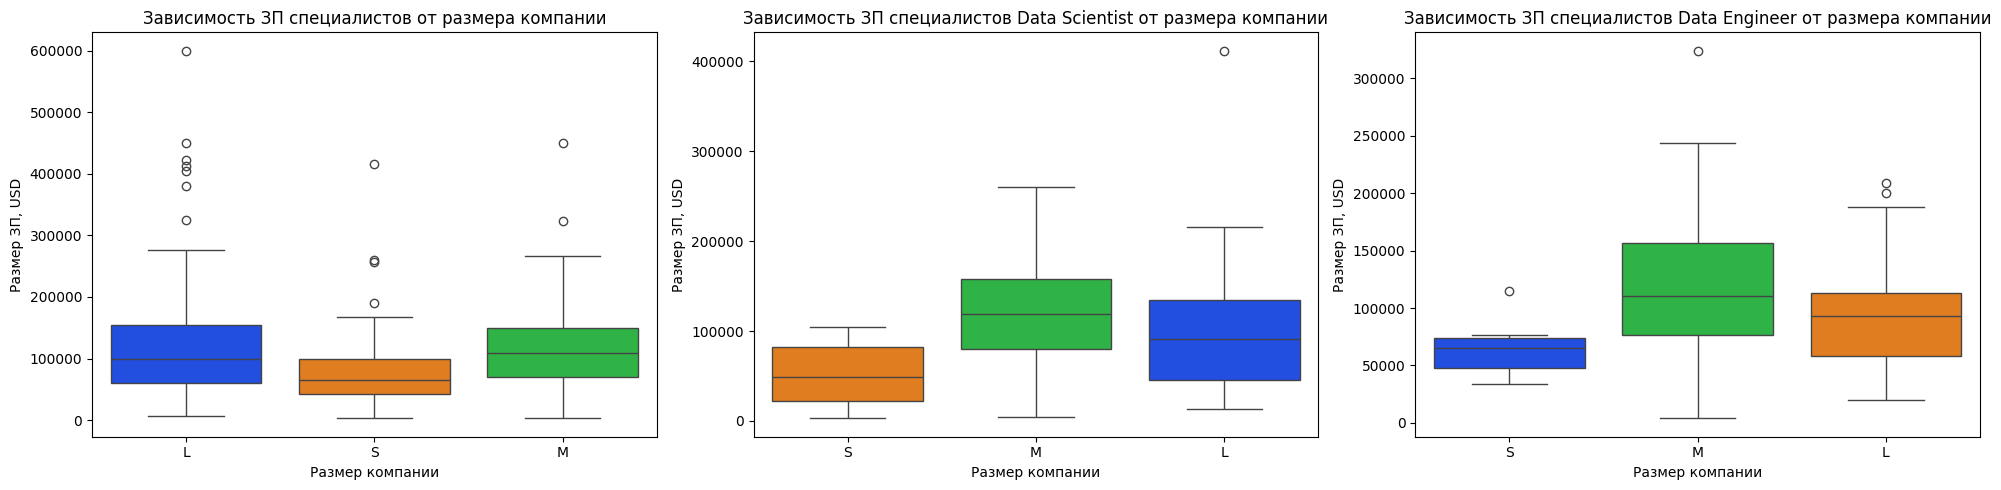

In [52]:
# Настройка холста
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Построим график зависимости ЗП специалистов от размера компании
sns.boxplot(df, x='company_size', y='salary_in_usd', hue='company_size', palette='bright', legend=False, ax=axes[0])
axes[0].set(xlabel='Размер компании', ylabel='Размер ЗП, USD')
axes[0].set_title('Зависимость ЗП специалистов от размера компании')

# Построим график зависимости ЗП специалистов Data Scientist от размера компании
order_size = ['S', 'M', 'L']
sns.boxplot(df[df['job_title'] == 'Data Scientist'], x='company_size', y='salary_in_usd', order = order_size, hue='company_size', palette= 'bright', legend=False, ax=axes[1])
axes[1].set(xlabel='Размер компании', ylabel='Размер ЗП, USD')
axes[1].set_title('Зависимость ЗП специалистов Data Scientist от размера компании')

# Построим график зависимости ЗП специалистов Data Engineer от размера компании
order_size = ['S', 'M', 'L']
sns.boxplot(df[df['job_title'] == 'Data Engineer'], x='company_size', y='salary_in_usd', order = order_size, hue='company_size', palette= 'bright', legend=False, ax=axes[2])
axes[2].set(xlabel='Размер компании', ylabel='Размер ЗП, USD')
axes[2].set_title('Зависимость ЗП специалистов Data Engineer от размера компании')

plt.tight_layout()
plt.show()

**Вывод:** <br>
1. График "Зависимость ЗП специалистов от размера компании" показывает, что зарплаты специалистов растут с увеличением размера компании. Крупные компании (L) предлагают самые высокие медианные зарплаты, благодаря своей финансовой стабильности и возможности привлекать квалифицированных специалистов.
Средние компании (M) занимают промежуточное положение, предлагая зарплаты ниже, чем у крупных (L), но выше, чем у малых (S). Широкий разброс в зарплатах указывает на потребность в высококвалифицированных специалистах для поддержания роста компании. Малые компании (S) предлагают наиболее низкие зарплаты, что связано с их ограниченными ресурсами.
2. График "Зависимость ЗП специалистов Data Scientist от размера компании" демонстрирует, что  размер компании существенно влияет на уровень заработной платы специалистов Data Scientist. Малые компании (S) предлагают самые низкие медианные зарплаты. Средние компании (M) выделяются наибольшими зарплатами, вероятно, привлекая квалифицированных сотрудников для обеспечения роста и повышения конкурентоспособности. В крупных компаниях (L) зарплаты Data Scientist выше, чем в малых, но ниже, чем в средних, что может объясняться тем, что часть обязанностей Data Scientist перераспределяется между другими узкоспециализированными специалистами, что снижает нагрузку и требования к позиции Data Scientist.
3. График "Зависимость ЗП специалистов Data Engineer от размера компании" демонстрирует, что размер компании существенно влияет на уровень заработной платы специалистов Data Engineer. Малые компании (S) предлагают самые низкие медианные зарплаты. Средние компании (M) выделяются наибольшими зарплатами, вероятно, привлекая квалифицированных сотрудников для обеспечения роста и повышения конкурентоспособности. В крупных компаниях (L) зарплаты Data Engineer выше, чем в малых, но ниже, чем в средних, что может объясняться тем, что часть обязанностей Data Engineer  перераспределяется между другими узкоспециализированными специалистами, что снижает нагрузку и требования к позиции Data Engineer.

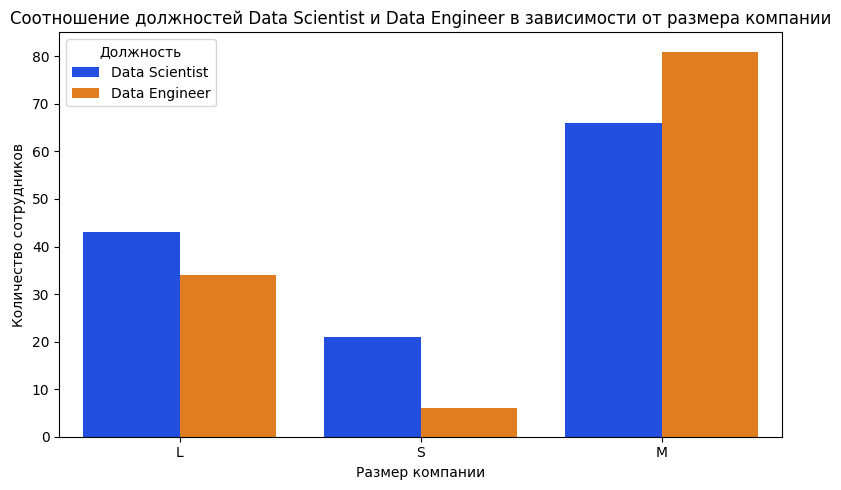

In [53]:
# Настройка холста
plt.figure(figsize=(8, 5))

# Отфильтруем данные для должностей Data Scientist и Data Engineer
filtered_df = df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Построим график соотношения должностей Data Scientist и Data Engineer в зависимости от размера компании
sns.countplot(data=filtered_df, x='company_size', hue='job_title', palette='bright')
plt.xlabel('Размер компании')
plt.ylabel('Количество сотрудников')
plt.title('Соотношение должностей Data Scientist и Data Engineer в зависимости от размера компании')
plt.legend(title='Должность')

# Отображение графика
plt.tight_layout()
plt.show()

**Вывод:** <br>
График "Соотношение должностей Data Scientist и Data Engineer в зависимости от размера компании" показывает как распределены данные должности по компаниям разных размеров. Согласно полученным результатам видно, что в больших (L) и малых (S) компаниях преобладают специалисты Data Scientist, в то время как в средних (M) компаниях наблюдается перевес Data Engineer. Данные результаты связанны с тем, что большие компании делегируют задачи между специализированными специалистами, что снижает потребность в Data Engineer. В малых компаниях Data Scientist могут выполнять более широкие функции, включая некоторые задачи Data Engineer, а в средних компании больше ориентированы на оптимизацию инфраструктуры данных, что повышает спрос на Data Engineers.

### **Итого по пункту 2.1:**

На основании проведённого визуального анализа данных ответим на поставленные вопросы HR-агентства: <br>
1. **Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?** Да, зарплаты специалистов Data Scientist демонстрируют тенденцию к ежегодному росту, что связано с повышенным спросом на специалистов в данной области.
2. **Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?** Медианная зарплата для Data Scientists несколько выше, чем медианная зарплата для Data Engineers, что может указывать на более высокую среднюю оплату труда для специалистов в области анализа данных.
3. **Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?** Размер компании существенно влияет на уровень заработной платы специалистов Data Scientist. Малые компании (S) предлагают самые низкие медианные зарплаты. Средние компании (M) выделяются наибольшими зарплатами, вероятно, привлекая квалифицированных сотрудников для обеспечения роста и повышения конкурентоспособности. В крупных компаниях (L) зарплаты Data Scientist выше, чем в малых, но ниже, чем в средних, что может объясняться тем, что часть обязанностей Data Scientist перераспределяется между другими узкоспециализированными специалистами, что снижает нагрузку и требования к позиции Data Scientist.
4. **Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?** Да, существует связь между размером компании и распределением должностей Data Scientist и Data Engineer. В больших (L) и малых (S) компаниях преобладают специалисты Data Scientist, в то время как в средних (M) компаниях наблюдается перевес Data Engineer. Данные результаты связанны с тем, что большие компании делегируют задачи между узкоспециализированными специалистами, что снижает потребность в Data Engineer. В малых компаниях Data Scientist могут выполнять более широкие функции, включая некоторые задачи Data Engineer, а в средних компании больше ориентированы на оптимизацию инфраструктуры данных, что повышает спрос на Data Engineers.

### **2.2. Статистический анализ данных**

**Задачи статистического анализа данных: <br>**
1. Сформулировать нулевые и альтернативные гипотезы на основе поставленных бизнес-вопросов.
2. Выбрать статистический тест для каждой из гипотез, предварительно проверив условие его применения (там, где это необходимо):
- проверка на нормальность;
- проверка равенства дисперсий в группах.
3. Протестировать данные, продемонстрировав владение различными статистическими тестами:
- тесты для количественного признака:
  - для одной выборки;
  - для двух выборок;
  - для нескольких выборок;
- тест для категориальных признаков.

#### **Сформулируем нулевые и альтернативные гипотезы на основе поставленных бизнес-вопросов и проведем тестирование**

In [65]:
# Задаём уровень значимости
alpha = 0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


In [66]:
# Функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# Функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

**Бизнес-вопрос №1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**

**Нулевая гипотеза**: ЗП у специалистов Data Scientist с 2020 года до 2022 года не повышается или уменьшается: 2020 год ($μ_1$), 2021 год ($μ_2$), 2022 год ($μ_3$).

$$ H_0 : μ_1 \geq μ_2 \geq μ_3$$

**Альтернативная гипотеза**: ЗП у специалистов Data Scientist с 2020 года до 2022 года повышается: 2020 год ($μ_1$), 2021 год ($μ_2$), 2022 год ($μ_3$).

$$ H_1 : μ_1 < μ_2 < μ_3$$

In [67]:
# Проверка данных на нормальность
salary_DS_2020 = df.loc[(df['job_title']=='Data Scientist') & (df['work_year'
                                                    ]==2020), 'salary_in_usd']
salary_DS_2021 = df.loc[(df['job_title']=='Data Scientist') & (df['work_year'
                                                    ]==2021), 'salary_in_usd']
salary_DS_2022 = df.loc[(df['job_title']=='Data Scientist') & (df['work_year'
                                                    ]==2022), 'salary_in_usd']

# Проводим тест Шапиро-Уилка
print('salary_DS_2020')
result = stats.shapiro(salary_DS_2020)
decision_normality(result[1])

print('\nsalary_DS_2021')
result = stats.shapiro(salary_DS_2021)
decision_normality(result[1])

print('\nsalary_DS_2022')
result = stats.shapiro(salary_DS_2022)
decision_normality(result[1])

salary_DS_2020
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

salary_DS_2021
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

salary_DS_2022
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака "Размер ЗП для специалистов Data Scientist (DS) в зависимости от года?" — Количественный.
* Сколько сравниваемых групп? — 3.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Так как у нас есть выборка с распределением отличным от нормального
выбираем Критерий Краскела — Уоллиса.

In [68]:
# Проводим тест
_, p = stats.kruskal(salary_DS_2020, salary_DS_2021, salary_DS_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Выводы:**  
На основании полученных результатов можно сделать вывод, что заработная плата специалистов в области Data Science ежегодно растет, что подтверждает высокий спрос на эту профессию.


**Бизнес-вопрос №2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**

**Нулевая гипотеза** ($H_0$): Размер зарплаты Data Scientist (DS) ($μ_1$) статистически больше либо равен размеру зарплаты Data Engineer (DE) в 2022 году ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

**Альтернативная гипотеза** ($H_1$): Размер зарплаты Data Scientist (DS) в 2022 году ($μ_1$) статистически меньше, чем размер зарплаты Data Engineer (DE) в 2022 году ($μ_2$).

$$ H_1 : μ_1 < μ_2$$


In [69]:
# Проверка на нормальность
salary_DS_2022 = df.loc[(df['job_title']=='Data Scientist') & (df['work_year'
                                                    ]==2022), 'salary_in_usd']
salary_DE_2022 = df.loc[(df['job_title']=='Data Engineer') & (df['work_year'
                                                    ]==2022), 'salary_in_usd']

# Проводим тест Шапиро-Уилка
print('salary_DS_2022')
result = stats.shapiro(salary_DS_2022)
decision_normality(result[1])

print('\nsalary_DE_2022')
result = stats.shapiro(salary_DE_2022)
decision_normality(result[1])

salary_DS_2022
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

salary_DE_2022
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака "Соотношение зарплат у специалистов Data Scientist (DS) и Data Engineer (DE) в 2022 году?" — Количественный.
* Сколько сравниваемых групп? — 2.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы будем использовать U-критерий Манна — Уитни.


In [70]:
# Проводим тест
_, p = stats.mannwhitneyu(salary_DS_2022, salary_DE_2022,  alternative='less')
decision_hypothesis(p)

p-value = 0.841
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Выводы:**<br>
На основании полученных результатов можно сделать вывод, что заработная плата
у специалистов Data Scientist (DS) больше либо равна заработной плате специалистов Data Engineer (DE) в 2022 году.

**Бизнес-вопрос №3.  Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**

**Нулевая гипотеза** ($H_0$): Размер зарплаты Data Scientist не отличается  в компаниях различных размеров: небольшая компания ($μ_1$), средняя компания ($μ_2$), крупная компания ($μ_3$)
$$ H_0 : μ_1 = μ_2 = μ_3$$

**Альтернативная гипотеза** ($H_1$): Размер зарплаты Data Scientist отличается  в компаниях различных размеров: небольшая компания ($μ_1$), средняя компания ($μ_2$), крупная компания ($μ_3$)

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

In [71]:
# Проверка на нормальность
salary_DS_size_S = df.loc[(df['job_title']=='Data Scientist') & (df['company_size'
                                                    ]=='S'), 'salary_in_usd']
salary_DS_size_M = df.loc[(df['job_title']=='Data Scientist') & (df['company_size'
                                                    ]=='M'), 'salary_in_usd']
salary_DS_size_L = df.loc[(df['job_title']=='Data Scientist') & (df['company_size'
                                                    ]=='L'), 'salary_in_usd']

# Проводим тест Шапиро-Уилка
print('salary_DS_size_S')
result = stats.shapiro(salary_DS_size_S )
decision_normality(result[1])

print('\nsalary_DS_size_M')
result = stats.shapiro(salary_DS_size_M)
decision_normality(result[1])

print('\nsalary_DS_size_L')
result = stats.shapiro(salary_DS_size_L)
decision_normality(result[1])

salary_DS_size_S
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

salary_DS_size_M
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

salary_DS_size_L
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака "Размер ЗП для специалистов Data Scientist (DS) в компаниях различных размеров?" — Количественный.
* Сколько сравниваемых групп? — 3.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Так как у нас есть выборка с распределением отличным от нормального
выбираем Критерий Краскела — Уоллиса.

In [72]:
# Проводим тест
_, p = stats.kruskal(salary_DS_size_S, salary_DS_size_M, salary_DS_size_L)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Выводы:**<br>
На основании полученных результатов можно сделать вывод, что размер компании существенно влияет на уровень заработной платы специалистов Data Scientist, что ещё раз подтверждает ранее полученные выводы в результате визуального анализа.

**Бизнес-вопрос №4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**

**Нулевая гипотеза**: Между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи.

**Альтернативная гипотеза**: Между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь.

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака Data Scientist и Data Engineer? — Категориальный.
* Сколько сравниваемых групп? — 2.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

In [73]:
# Создадим таблицу по интересующим вакансиям
data_ds_de = df[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'Data Engineer')]

In [74]:
# Составляем таблицу сопряжённости
cross_table = pd.crosstab(data_ds_de['job_title'], data_ds_de['company_size'])
cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [75]:
# Проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Выводы:**  
Между размером компании и распределением должностей Data Scientist и Data Engineer есть взаимосвязь, что ещё раз подтверждает ранее полученные выводы в результате визуального анализа.

### **Итого по пункту 2.2:**

На основании проведённого статистического анализа данных ответим на поставленные вопросы HR-агентства: <br>
1. **Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?** Да, зарплаты специалистов Data Scientist демонстрируют тенденцию к ежегодному росту, что связано с повышенным спросом на специалистов в данной области.
2. **Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?** Заработная плата у специалистов Data Scientist (DS) больше либо равна заработной плате специалистов Data Engineer (DE) в 2022 году.
3. **Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?** Размер компании существенно влияет на уровень заработной платы специалистов Data Scientist, что ещё раз подтверждает ранее полученные выводы в результате визуального анализа.
4. **Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?** Между размером компании и распределением должностей Data Scientist и Data Engineer есть взаимосвязь, что ещё раз подтверждает ранее полученные выводы в результате визуального анализа.

### **Дополнительное исследование**
**Задачи дополнительного исследования данных: <br>**
1. Сформулировать дополнительные нулевые и альтернативные гипотезы.
2. Выбрать статистический тест для каждой из гипотез, предварительно проверив условие его применения (там, где это необходимо):
- проверка на нормальность;
- проверка равенства дисперсий в группах.
3. Протестировать данные.
4. Сделать выводы по полученным результатам.

#### **Сформулируем дополнительные нулевые и альтернативные гипотезы и проведем тестирование**

**Дополнительный вопрос №1. Есть ли связь между типом занятости специалистов в сфере Data Science и размером заработной платы?**

**Нулевая гипотеза**: Размер заработной платы специалистов в сфере Data Science не зависит от типа занятости: PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

**Альтернативная гипотеза**: Размер заработной платы специалистов в сфере Data Science зависит от типа занятости: PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$


In [76]:
# Проверка на нормальность
def check_normality(data, name):
    print(name)
    if len(data) >= 3:
        result = stats.shapiro(data)
        decision_normality(result.pvalue)
    else:
        print(f"Недостаточно данных для проверки нормальности (n={len(data)})\n")

# Выборки зарплат по типу занятости
salary_DS_PT = df.loc[(df['employment_type'] == 'PT'), 'salary_in_usd']
salary_DS_FT = df.loc[(df['employment_type'] == 'FT'), 'salary_in_usd']
salary_DS_CT = df.loc[(df['employment_type'] == 'CT'), 'salary_in_usd']
salary_DS_FL = df.loc[(df['employment_type'] == 'FL'), 'salary_in_usd']

# Проверяем каждую выборку
check_normality(salary_DS_PT, "salary_DS_PT")
check_normality(salary_DS_FT, "salary_DS_FT")
check_normality(salary_DS_CT, "salary_DS_CT")
check_normality(salary_DS_FL, "salary_DS_FL")

salary_DS_PT
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
salary_DS_FT
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
salary_DS_CT
p-value = 0.406
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
salary_DS_FL
p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака "Размер ЗП для специалистов в сфере Data Science в зависимости от типа занятости?" — Количественный.
* Сколько сравниваемых групп? — 4.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Так как у нас есть выборка с распределением отличным от нормального
выбираем Критерий Краскела — Уоллиса.

In [77]:
# Проведем тест
_, p = stats.kruskal(salary_DS_PT, salary_DS_FT, salary_DS_CT, salary_DS_FL)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Выводы:**  
Между типом занятости и размером заработной платы специалистов в сфере Data Science есть взаимосвязь, что ещё раз подтверждает ранее полученные выводы в результате визуального анализа.

**Дополнительный вопрос №2. Есть ли связь между типом работы и размером заработной платы специалистов в сфере Data Science?**

**Нулевая гипотеза**:Размер заработной платы специалистов в сфере Data Science в зависимости от типа работы не отличаются: 0 ($μ_1$), 50 ($μ_2$), 100 ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

**Альтернативная гипотеза**: Размер заработной платы специалистов в сфере Data Science в зависимости от типа работы отличаются: 0 ($μ_1$), 50 ($μ_2$), 100 ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

In [78]:
# Проверка на нормальность
salary_DS_0 = df.loc[df['remote_ratio']==0, 'salary_in_usd']
salary_DS_50 = df.loc[df['remote_ratio']==50, 'salary_in_usd']
salary_DS_100 = df.loc[df['remote_ratio']==100, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('salary_DS_0')
result = stats.shapiro(salary_DS_0)
decision_normality(result[1])

print('\nsalary_DS_50')
result = stats.shapiro(salary_DS_50)
decision_normality(result[1])

print('\nsalary_DS_100')
result = stats.shapiro(salary_DS_100)
decision_normality(result[1])

salary_DS_0
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

salary_DS_50
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

salary_DS_100
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака "Размер ЗП для специалистовв сфере Data Science  в зависимости от типа работы" — Количественный.
* Сколько сравниваемых групп? — 3.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Так как у нас есть выборка с распределением отличным от нормального
выбираем Критерий Краскела — Уоллиса.

In [79]:
# Проведем тест
_, p = stats.kruskal(salary_DS_0, salary_DS_50, salary_DS_100)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Выводы:**  
Между типом работы и размером заработной платы специалистов в сфере Data Science есть взаимосвязь, что ещё раз подтверждает ранее полученные выводы в результате визуального анализа.

### **Итого:**<br>
В результате проведенного исследование о зарплатах специалистов в сфере Data Science за 2020–2022 годы были рассмотрены вопросы, поставленные HR-агентством, и сделаны следующие выводы:  <br>
1. Зарплаты специалистов Data Scientist демонстрируют тенденцию к ежегодному росту, что связано с повышенным спросом на специалистов в данной области.
2. Медианная зарплата для Data Scientists несколько выше, чем медианная зарплата для Data Engineers, что может указывать на более высокую среднюю оплату труда для специалистов в области анализа данных.
3. Размер компании существенно влияет на уровень заработной платы специалистов Data Scientist. Малые компании (S) предлагают самые низкие медианные зарплаты. Средние компании (M) выделяются наибольшими зарплатами, вероятно, привлекая квалифицированных сотрудников для обеспечения роста и повышения конкурентоспособности. В крупных компаниях (L) зарплаты Data Scientist выше, чем в малых, но ниже, чем в средних, что может объясняться тем, что часть обязанностей Data Scientist перераспределяется между другими узкоспециализированными специалистами, что снижает нагрузку и требования к позиции Data Scientist.
4. Существует связь между размером компании и распределением должностей Data Scientist и Data Engineer. В больших (L) и малых (S) компаниях преобладают специалисты Data Scientist, в то время как в средних (M) компаниях наблюдается перевес Data Engineer. Данные результаты связанны с тем, что большие компании делегируют задачи между узкоспециализированными специалистами, что снижает потребность в Data Engineer. В малых компаниях Data Scientist могут выполнять более широкие функции, включая некоторые задачи Data Engineer, а в средних компании больше ориентированы на оптимизацию инфраструктуры данных, что повышает спрос на Data Engineers.

Также по результатам визуального анализа данных и проведенного дополнительного исследования данных было выявлено, что размер заработной платы специалистов в сфере Data Science за 2020–2022 зависит от множества факторов:
- год, в котором была начислена зарплата;
- опыт работы на должности;
- тип занятости;
- должность, в которой соискатель работал в течение года;
- основная страна проживания сотрудника в течение рабочего года;
- общий объём работы, выполняемой удалённо;
- страна главного офиса работодателя или филиала по контракту;
- размер компании.